In [1]:
conda -V

conda 22.11.1

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda list

# packages in environment at /home/renzoespinoza/data_projects/d212/env:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_openmp_mutex             5.1                       1_gnu  
anyio                     3.5.0           py310h06a4308_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0          py310h7f8727e_0  
asttokens                 2.0.5              pyhd3eb1b0_0  
attrs                     22.1.0          py310h06a4308_0  
backcall                  0.2.0              pyhd3eb1b0_0  
beautifulsoup4            4.11.1          py310h06a4308_0  
blas                      1.0                         mkl  
bleach                    4.1.0              pyhd3eb1b0_0  
bottleneck                1.3.5           py310ha9d4c09_0  
brotli                    1.0.9                h5eee18b_7  
brotli-bin                1.0.9                h5eee18b_7  
brotlipy          


Note: you may need to restart the kernel to use updated packages.


# Part I: Research Question

### Is the length of a customer's tenure with the company related to the 8 factors that they rated based on importance?

# Part III: Data Preparation

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import pingouin as pg

In [50]:
sns.set_theme(style='darkgrid')
plt.rcParams['figure.dpi'] = 125

In [51]:
churn = pd.read_csv('churn_clean.csv', index_col=0)

In [52]:
churn.reset_index(drop=True, inplace=True)

In [53]:
with pd.option_context('display.max_rows', 6, 'display.max_columns', None): 
    display(churn)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,IT technical support officer,1,48,45983.43,Never Married,Female,No,6.590911,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,Urban,America/New_York,Water engineer,1,39,16667.58,Separated,Male,No,12.071910,14,1,0,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.624000,6468.456752,4,4,6,4,3,3,5,4
9999,T38070,9de5fb6e-bd33-4995-aec8-f01d0172a499,0ea683a03a3cd544aefe8388aab16176,Clarkesville,GA,Habersham,30523,34.70783,-83.53648,12230,Urban,America/New_York,Personal assistant,1,28,9020.92,Never Married,Male,No,11.754720,17,1,0,No,Month-to-month,Yes,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Electronic Check,63.350860,217.484000,5857.586167,2,2,3,3,3,3,4,1


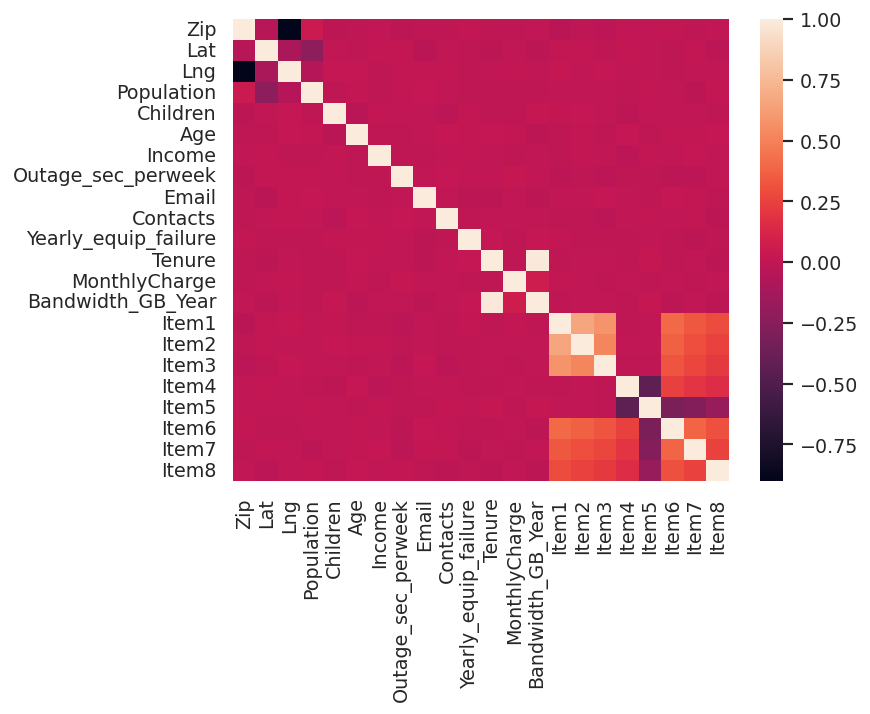

In [54]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    corr = churn.corr(numeric_only=True)
    sns.heatmap(corr)

### Renaming 'Item' columns

In [55]:
survey_names = {'Item8': 'Active_listening', 'Item7': 'Courteous_exchange', 'Item6': 'Respectful_response', 'Item5': 'Options',
                'Item4': 'Reliability', 'Item3': 'Timely_replacements', 'Item2': 'Timely_fixes', 'Item1': 'Timely_response'}
churn.rename(columns=survey_names, inplace=True)


### Checking for input errors

In [56]:
surveys = churn.iloc[:, -8:]
surveys

,Timely_response,Timely_fixes,Timely_replacements,Reliability,Options,Respectful_response,Courteous_exchange,Active_listening
0,5,5,5,3,4,4,3,4
1,3,4,3,3,4,3,4,4
2,4,4,2,4,4,3,3,3
3,4,4,4,2,5,4,3,3
4,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...
9995,3,2,3,3,4,3,2,3
9996,4,5,5,4,4,5,2,5
9997,4,4,4,4,4,4,4,5
9998,4,4,6,4,3,3,5,4


In [57]:
surveys.isnull().sum()

Timely_response        0
Timely_fixes           0
Timely_replacements    0
Reliability            0
Options                0
Respectful_response    0
Courteous_exchange     0
Active_listening       0
dtype: int64

In [58]:
surveys.loc[: , ~surveys.isin(range(1,8)).any()]

""
0
1
2
3
4
...
9995
9996
9997
9998


### All of the columns are of the same scale (1 - 8)

## Dimension Reduction with PCA

In [81]:
pca = PCA(n_components=0.95)
pca.fit(surveys)

PCA(n_components=0.95)

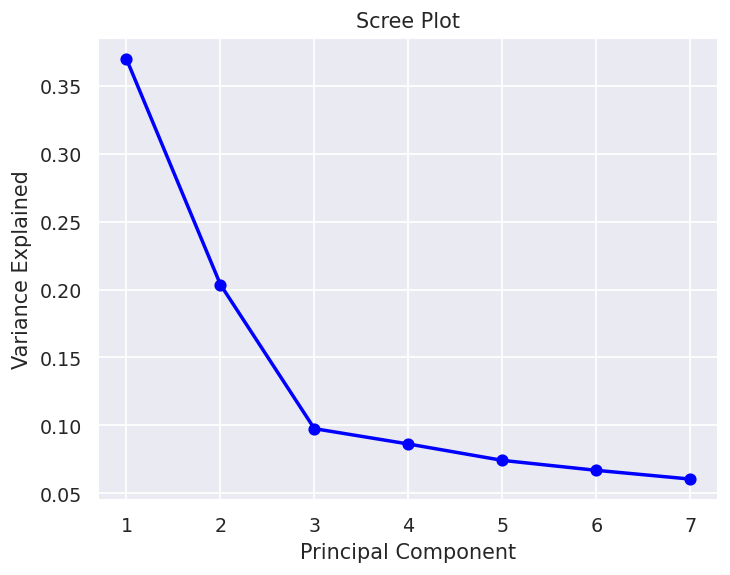

In [82]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [83]:
pca.explained_variance_

array([3.13996665, 1.72951014, 0.82841618, 0.73251864, 0.6301376 ,
       0.56783188, 0.51312393])

In [84]:
pca = PCA(n_components=3)
pca.fit(surveys)
pca_features = pca.transform(surveys)
pca_results = pd.DataFrame(pca_features,columns=['pca1','pca2', 'pca3'])

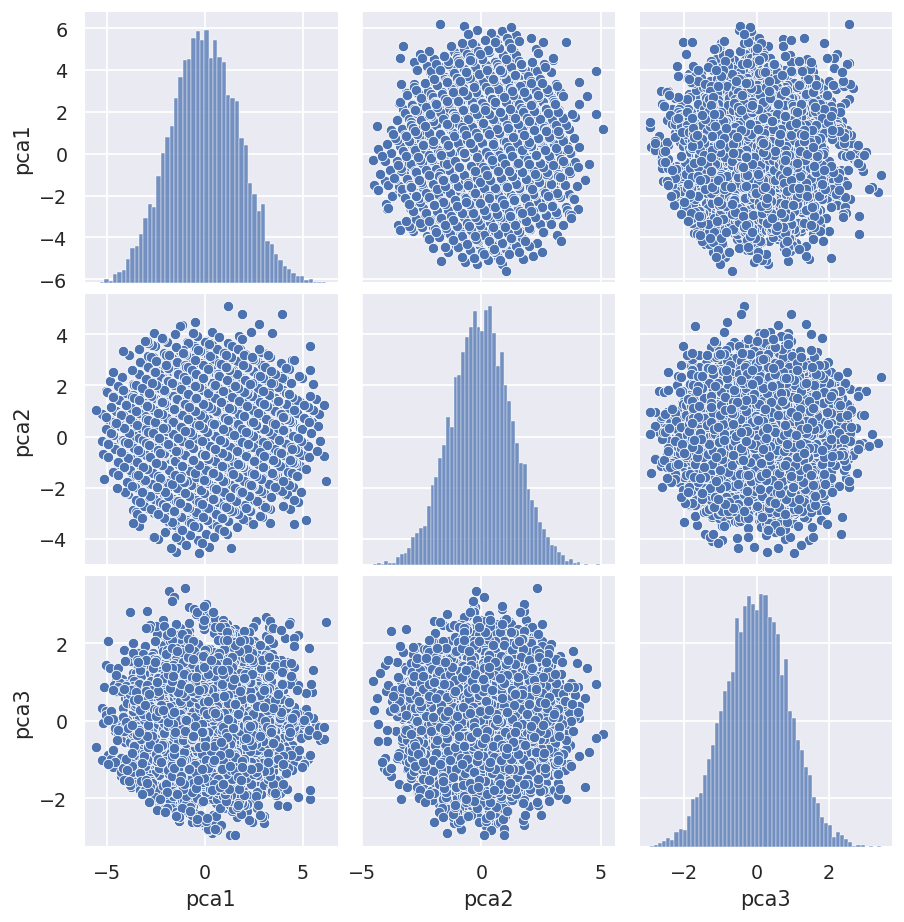

In [85]:
sns.pairplot(pca_results)

In [86]:
components = pd.DataFrame(pca.components_, columns=surveys.columns.values)
components

,Timely_response,Timely_fixes,Timely_replacements,Reliability,Options,Respectful_response,Courteous_exchange,Active_listening
0,0.463524,0.437145,0.399727,0.142049,-0.171107,0.405284,0.355722,0.306626
1,0.282598,0.284578,0.279259,-0.568853,0.589940,-0.190586,-0.185682,-0.136909
2,-0.068548,-0.105863,-0.170086,-0.171667,0.135984,-0.064212,-0.185691,0.931987


In [87]:
pca_results.to_csv('PA1_cleaned_data.csv')

# Part IV: Analysis

In [88]:
inertia = []
for i in range(1,10):
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(pca_results)
    inertia.append(kmeanModel.inertia_)

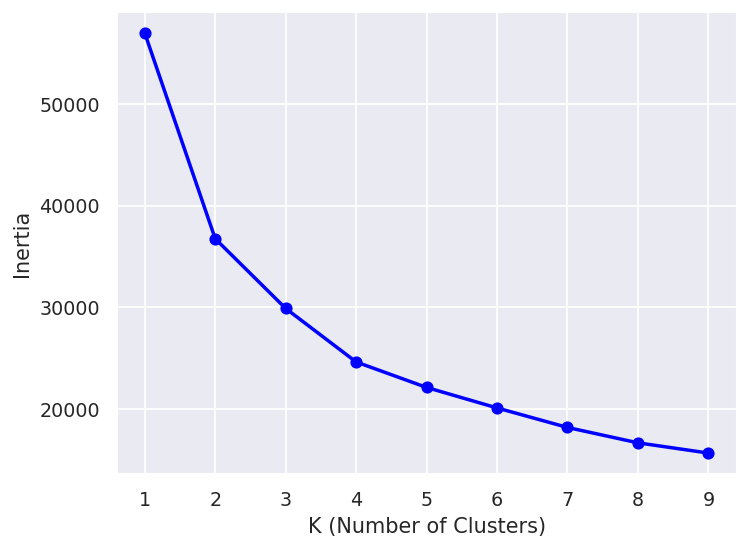

In [89]:
plt.plot(range(1,10), inertia, 'o-', linewidth=2, color='blue')
plt.xlabel('K (Number of Clusters)')
plt.ylabel('Inertia')
plt.show()

In [68]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(pca_results)
pca_results['clusters'] = kmeanModel.predict(pca_results)

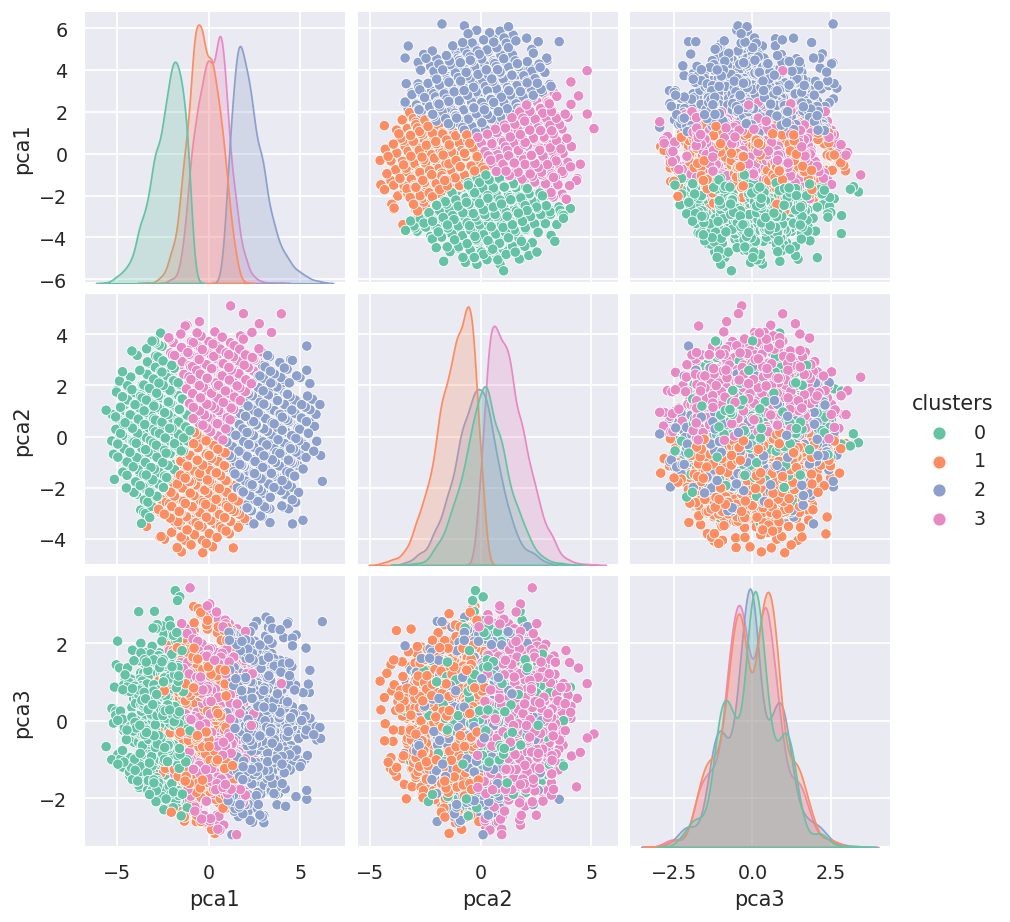

In [69]:
sns.pairplot(pca_results, hue='clusters', palette='Set2')

In [70]:
print('The inertia for this k-means clustering model is:', kmeanModel.inertia_)

The inertia for this k-means clustering model is: 24602.027508345793


In [71]:
pca_results['tenure'] = churn.Tenure

In [72]:
pca_results

,pca1,pca2,pca3,clusters,tenure
0,1.977546,1.786335,0.167738,3,6.795513
1,-0.235663,0.382946,0.629391,3,1.156681
2,-0.692165,0.140023,-0.187033,1,15.754144
3,0.057369,2.235603,-0.112099,3,17.087227
4,1.339498,0.617309,1.258531,2,1.670972
...,...,...,...,...,...
9995,-2.128023,0.322065,0.280514,0,68.197130
9996,2.012258,0.793072,1.118085,2,61.040370
9997,1.481546,0.048456,1.086863,2,47.416890
9998,2.095920,0.158846,-0.442759,2,71.095600


<AxesSubplot: xlabel='clusters', ylabel='tenure'>

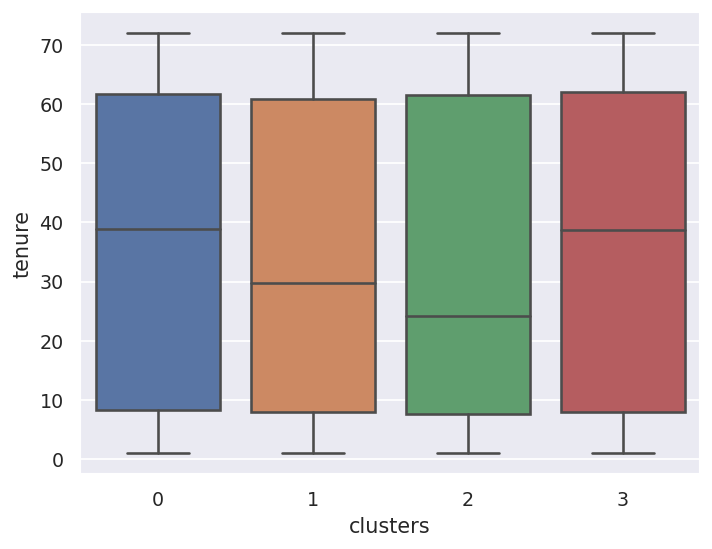

In [73]:
sns.boxplot(data=pca_results, x='clusters', y='tenure')

In [74]:
anova_results = pg.anova(data=pca_results,dv="tenure",between="clusters")
print(anova_results)

     Source  ddof1  ddof2         F     p-unc       np2
0  clusters      3   9996  0.556924  0.643464  0.000167


# Part IV: Data Summary and Implications

### There is not a statistically significant difference between the four clusters of customers based on their answers to the eight survey questions.

### My recommended course of action would be to perform further cluster analysis using a different combination of factors than the one I used for this specific analysis.